In [230]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [231]:
def findCenterAndOrientation(img):
    m = cv2.moments(img)
    cen_x = int(m["m10"]/m["m00"])
    cen_y = int(m["m01"]/m["m00"])
    theta = 0.5 * math.atan2(2*m["mu11"], m["mu20"]-m["mu02"])
    return cen_x, cen_y, theta

In [233]:
def rotate(img):
   rotation = np.float32(np.empty((img.shape)))
   height, width = img.shape[1:3] 
   for i in range(img.shape[0]):
      x, y, theta = findCenterAndOrientation(img[i])
      rotM = cv2.getRotationMatrix2D(center=(x,y), angle=theta*180/math.pi, scale=1)
      rotation[i] = cv2.warpAffine(src=img[i], M=rotM, dsize=(width, height))
   return rotation 

In [234]:
def center(img):
    print(img.shape)
    center = int(img.shape[1]/2) 
    deslocate = np.float32(np.empty((img.shape)))
    for i in range(img.shape[0]):
        x, y, theta = findCenterAndOrientation(img[i])
        M = np.float32([[1,0,center-x],[0,1,center-y]])
        deslocate[i] = cv2.warpAffine(img[i], M, (img.shape[1], img.shape[2]))
    return deslocate 

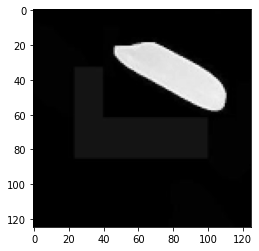

In [235]:
st = "Jasmine" + "2" + ".jpg"; st = "orientacao"+"/"+st
a=cv2.imread(st,0)
a=cv2.resize(a,(125,125),interpolation=cv2.INTER_AREA)
img = np.float32(np.empty((1,125,125)))
img[0] = a
imgplot = plt.imshow(img[0], cmap='gray')
plt.show()

(1, 125, 125)


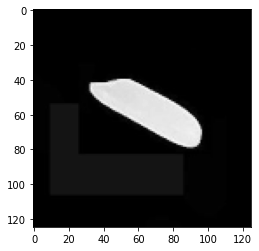

In [236]:
deslocated = center(img)
imgplot = plt.imshow(deslocated[0], cmap='gray')
plt.show()

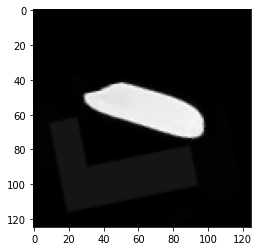

In [237]:
rotated = rotate(deslocated)
imgplot = plt.imshow(rotated[0], cmap='gray')
plt.show()